# importando bibliotecas

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Processando dados

In [123]:
df = pd.read_csv('outputCustom_10000.csv', delimiter =';', thousands=".")
df.head() 

,Id,creliq,idade,status_civil,ocupacao,numero_dependentes,renda_mensal,valor_patrim,valor_financ,cred_aberto
0,0,1,46,SEPARADO_JUDICIALMENTE,1,4,29642231,4221328721,6814182242,13
1,1,0,27,VIUVO,1,3,49859241,4662786806,913974377,4
2,2,1,46,SEPARADO_JUDICIALMENTE,1,4,9254104,4657704318,6047256752,6
3,3,1,78,SEPARADO_JUDICIALMENTE,1,3,3536244,4199745212,1537374527,9
4,4,1,65,UNIAO_ESTAVEL,1,2,905590382,863476625,1831016438,12


## Identificando dados faltantes

In [124]:
df.isnull().sum()

Id                    0
creliq                0
idade                 0
status_civil          0
ocupacao              0
numero_dependentes    0
renda_mensal          0
valor_patrim          0
valor_financ          0
cred_aberto           0
dtype: int64

## Eliminando variaveis

In [125]:
df1 = df.drop(columns = ['Id'])

## Verificando correlações

In [126]:
df1.describe().T 

,count,mean,std,min,25%,50%,75%,max
creliq,10000.0,9.478000e-01,2.224412e-01,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
idade,10000.0,5.206350e+01,1.956530e+01,18.0,3.500000e+01,5.200000e+01,6.900000e+01,8.500000e+01
ocupacao,10000.0,9.574000e-01,2.019637e-01,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
numero_dependentes,10000.0,1.595900e+00,1.466771e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
renda_mensal,10000.0,6.694527e+07,1.629449e+08,461.0,1.019285e+07,2.593467e+07,4.081234e+07,9.997710e+08
valor_patrim,10000.0,5.428030e+09,1.258159e+10,65563.0,1.102142e+09,2.841685e+09,4.518975e+09,9.999105e+10
valor_financ,10000.0,2.329791e+09,2.342866e+09,134923.0,7.041862e+08,1.708782e+09,2.750820e+09,9.998045e+09
cred_aberto,10000.0,9.921600e+00,6.060159e+00,0.0,5.000000e+00,1.000000e+01,1.500000e+01,2.000000e+01


In [127]:
df1.isna().sum()

creliq                0
idade                 0
status_civil          0
ocupacao              0
numero_dependentes    0
renda_mensal          0
valor_patrim          0
valor_financ          0
cred_aberto           0
dtype: int64

In [128]:
df1.corr()

,creliq,idade,ocupacao,numero_dependentes,renda_mensal,valor_patrim,valor_financ,cred_aberto
creliq,1.000000,-0.028009,-0.025016,0.003390,-0.088326,0.021798,-0.011423,-0.000514
idade,-0.028009,1.000000,0.001444,0.012133,-0.007352,0.000213,-0.005850,-0.006066
ocupacao,-0.025016,0.001444,1.000000,-0.004438,-0.001839,-0.759856,-0.001060,-0.000196
numero_dependentes,0.003390,0.012133,-0.004438,1.000000,-0.008483,0.121655,-0.011921,-0.012734
renda_mensal,-0.088326,-0.007352,-0.001839,-0.008483,1.000000,-0.000542,0.011952,0.021190
valor_patrim,0.021798,0.000213,-0.759856,0.121655,-0.000542,1.000000,0.003781,-0.001311
valor_financ,-0.011423,-0.005850,-0.001060,-0.011921,0.011952,0.003781,1.000000,-0.006432
cred_aberto,-0.000514,-0.006066,-0.000196,-0.012734,0.021190,-0.001311,-0.006432,1.000000


In [129]:
# Plotting a diagonal correlation matrix
#sns.set(style="white")
corr = df1.corr()
corr

,creliq,idade,ocupacao,numero_dependentes,renda_mensal,valor_patrim,valor_financ,cred_aberto
creliq,1.000000,-0.028009,-0.025016,0.003390,-0.088326,0.021798,-0.011423,-0.000514
idade,-0.028009,1.000000,0.001444,0.012133,-0.007352,0.000213,-0.005850,-0.006066
ocupacao,-0.025016,0.001444,1.000000,-0.004438,-0.001839,-0.759856,-0.001060,-0.000196
numero_dependentes,0.003390,0.012133,-0.004438,1.000000,-0.008483,0.121655,-0.011921,-0.012734
renda_mensal,-0.088326,-0.007352,-0.001839,-0.008483,1.000000,-0.000542,0.011952,0.021190
valor_patrim,0.021798,0.000213,-0.759856,0.121655,-0.000542,1.000000,0.003781,-0.001311
valor_financ,-0.011423,-0.005850,-0.001060,-0.011921,0.011952,0.003781,1.000000,-0.006432
cred_aberto,-0.000514,-0.006066,-0.000196,-0.012734,0.021190,-0.001311,-0.006432,1.000000


C:\Users\tresende\AppData\Local\Temp/ipykernel_3012/4030833049.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

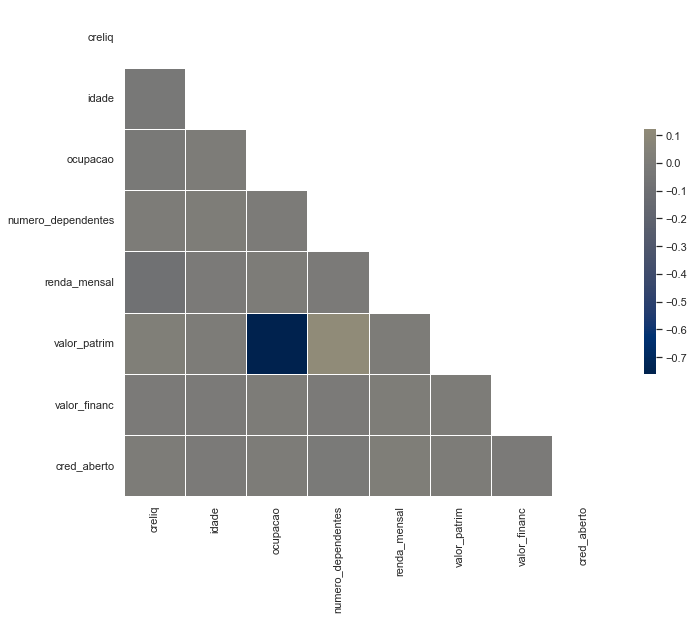

In [130]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = "cividis"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)


## Normalização Manual

In [131]:
atributos = df1.columns

In [132]:
a = { 'UNIAO_ESTAVEL' : 1,
      'OUTRO' : 2,
      'CASADO' : 3,
      'VIUVO' : 4,
     'SEPARADO_JUDICIALMENTE': 5,
     'DIVORCIADO' : 6,
     'SOLTEIRO':  7
    }
df1['status_civil'] = df1['status_civil'].map(a)

In [139]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df1)
df_np = pd.DataFrame(np_df, columns = df1.columns)
df_np

,creliq,idade,status_civil,ocupacao,numero_dependentes,renda_mensal,valor_patrim,valor_financ,cred_aberto
0,1.0,0.417910,0.666667,1.0,0.8,0.029649,0.042216,0.681547,0.65
1,0.0,0.134328,0.500000,1.0,0.6,0.049870,0.046631,0.091403,0.20
2,1.0,0.417910,0.666667,1.0,0.8,0.009256,0.046581,0.604839,0.30
3,1.0,0.895522,0.666667,1.0,0.6,0.003537,0.042001,0.153756,0.45
4,1.0,0.701493,0.000000,1.0,0.4,0.905798,0.008635,0.183126,0.60
...,...,...,...,...,...,...,...,...,...
9995,1.0,0.164179,0.500000,1.0,0.4,0.044463,0.033782,0.104281,0.90
9996,1.0,0.582090,0.000000,1.0,0.4,0.012767,0.036057,0.239926,0.45
9997,1.0,0.253731,0.833333,1.0,0.4,0.009259,0.025762,0.044344,0.60
9998,1.0,0.850746,0.666667,1.0,0.0,0.031236,0.080054,0.206014,0.05


In [ ]:
#  desnormalização
np_df = min_max_scaler_inverse_transform

In [134]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   creliq              10000 non-null  int64
 1   idade               10000 non-null  int64
 2   status_civil        10000 non-null  int64
 3   ocupacao            10000 non-null  int64
 4   numero_dependentes  10000 non-null  int64
 5   renda_mensal        10000 non-null  int64
 6   valor_patrim        10000 non-null  int64
 7   valor_financ        10000 non-null  int64
 8   cred_aberto         10000 non-null  int64
dtypes: int64(9)
memory usage: 703.2 KB


In [87]:
def group(number):
    s = '%d' % number
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + '.'.join(reversed(groups))

In [88]:
for i in range (df1.shape[0]): 
    df1['valor_patrim'][i] = group(df1['valor_patrim'][i])
    df1['renda_mensal'][i] = group(df1['renda_mensal'][i])
    df1['valor_financ'][i] = group(df1['valor_financ'][i])  

C:\Users\tresende\AppData\Local\Temp/ipykernel_3012/926518621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['renda_mensal'][i] = group(df1['renda_mensal'][i])
C:\Users\tresende\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\tresende\AppData\Local\Temp/ipykernel_3012/926518621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [89]:
for i in range (df1.shape[0]): 
    df1['valor_patrim'][i] = float(df1['valor_patrim'][i].replace('.', ''))
    df1['renda_mensal'][i] = float(df1['renda_mensal'][i].replace('.', ''))
    df1['valor_financ'][i]  = float(df1['valor_financ'][i].replace('.', ''))

In [91]:
for i in range (df1.shape[0]): 
    df1['valor_patrim'] = df1['valor_patrim'].astype(float, '{0:,.0f}'.format)
    df1['renda_mensal'] = df1['renda_mensal'].astype(float, '{0:,.0f}'.format)
    df1['valor_financ'] = df1['valor_financ'].astype(float, '{0:,.0f}'.format)

In [95]:
labelsCo = [1,2,3,4,5,6,7,8]
labelsPa = [1,2,3,4]
labelsSa = [1,2,3,4,5,6]
df1['valor_patrim'] = pd.cut(df1['valor_patrim'], bins=8, labels=labelsCo)
df1['renda_mensal'] = pd.cut(df1['renda_mensal'], bins=4, labels=labelsPa)
df1['valor_financ'] = pd.cut(df1['valor_financ'], bins=6, labels=labelsSa)

In [96]:
df1

,creliq,idade,status_civil,ocupacao,numero_dependentes,renda_mensal,valor_patrim,valor_financ,cred_aberto
0,1,46,5,1,4,1,1,5,13
1,0,27,4,1,3,1,1,1,4
2,1,46,5,1,4,1,1,4,6
3,1,78,5,1,3,1,1,1,9
4,1,65,1,1,2,4,1,2,12
...,...,...,...,...,...,...,...,...,...
9995,1,29,4,1,2,1,1,1,18
9996,1,57,1,1,2,1,1,2,9
9997,1,35,6,1,2,1,1,1,12
9998,1,75,5,1,0,1,1,2,1


In [97]:
df1.describe()

,creliq,idade,status_civil,ocupacao,numero_dependentes,cred_aberto
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.947800,52.063500,3.987800,0.957400,1.595900,9.921600
std,0.222441,19.565305,2.019965,0.201964,1.466771,6.060159
min,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,35.000000,2.000000,1.000000,0.000000,5.000000
50%,1.000000,52.000000,4.000000,1.000000,1.000000,10.000000
75%,1.000000,69.000000,6.000000,1.000000,2.000000,15.000000
max,1.000000,85.000000,7.000000,1.000000,5.000000,20.000000


In [106]:
print('De %s até %s anos' % (df1.idade.min(), df1.idade.max()))

De 18 até 85 anos


In [112]:
classes = [df1['cred_aberto'].min(), 5, 10, df1['cred_aberto'].max()]
labels = [1,2,3]
df1['idade'] = pd.cut(df1['idade'], bins=classes, labels=labels, include_lowest = True)

In [113]:
classes = [df1.idade.min(), 35, 52, df1.idade.max()]
labels = [1,2,3]
df1['cred_aberto'] = pd.cut(df1['cred_aberto'], bins=6, labels=labelsSa, include_lowest = True)

In [121]:
df1 = df1.astype({'cred_aberto':'float',
                'idade':'float',
                'renda_mensal':'float',
                'valor_patrim':'float',
                'cred_aberto':'float'
               })

C:\Users\tresende\AppData\Local\Temp/ipykernel_3012/3434888745.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

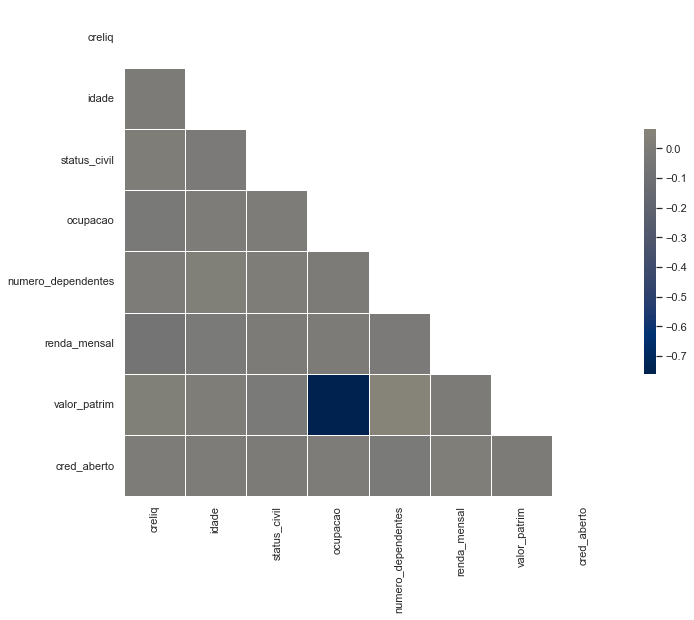

In [122]:
corr = df1.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = "cividis"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)


C:\Users\tresende\AppData\Local\Temp/ipykernel_3012/74204309.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_np, dtype=np.bool))


<AxesSubplot:>

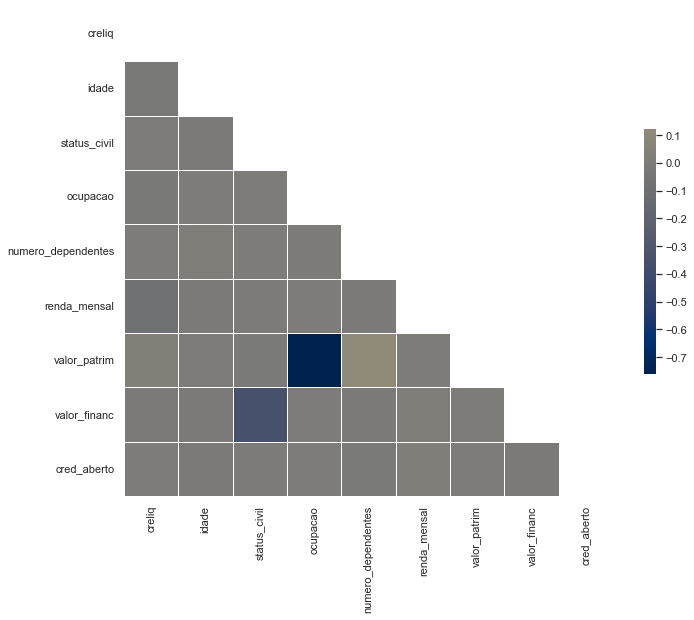

In [141]:
corr_np = df_np.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_np, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = "cividis"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr_np,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

In [172]:
from sklearn.cluster import KMeans
agrupador = KMeans(n_clusters=7)
agrupador.fit(df_np)

KMeans(n_clusters=7)

In [167]:
labels = agrupador.labels_
print(labels)

[1 1 1 ... 1 1 1]


In [168]:
df_np.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   creliq              10000 non-null  float64
 1   idade               10000 non-null  float64
 2   status_civil        10000 non-null  float64
 3   ocupacao            10000 non-null  float64
 4   numero_dependentes  10000 non-null  float64
 5   renda_mensal        10000 non-null  float64
 6   valor_patrim        10000 non-null  float64
 7   valor_financ        10000 non-null  float64
 8   cred_aberto         10000 non-null  float64
dtypes: float64(9)
memory usage: 703.2 KB


In [177]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_np['valor_financ'], y = df_np['creliq'],
                                                        mode = 'markers',                      
                                                        marker = dict(color = agrupador.labels_.astype(np.float)),
                                                        text = labels))
fig.show()

C:\Users\tresende\AppData\Local\Temp/ipykernel_3012/4175004354.py:5: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [185]:
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.metrics import silhouette_score
labels = agrupador.labels_
labels

array([1, 5, 1, ..., 3, 4, 3])

In [188]:
from sklearn.cluster import KMeans
valores_silhueta = []
faixa_n_clusters = [i for i in range(2,10)]

for k in faixa_n_clusters:
    agrupador = KMeans(n_clusters=k)
    labels = agrupador.fit_predict(df_np)
    media_silhueta = silhouette_score(df_np, labels)
    valores_silhueta.append(media_silhueta)


In [190]:
fig =go.Figure()
fig.add_trace(go.Scatter(x = faixa_n_clusters, y = valores_silhueta))
fig.update_layout(
    title = "Valores de Silhueta Médios",
    xaxis_title = "Número de Clústeres",
    yaxis_title = "Valor médio de silhueta",
    )

In [258]:
agrupador = KMeans(n_clusters=4, random_state = 22)
labels = agrupador.fit_predict(df_np)
media_silhueta = silhouette_score(df_np, labels)
valores_silhueta.append(media_silhueta)

In [281]:
df_np.iloc[25,:]

creliq                1.000000
idade                 0.402985
status_civil          0.333333
ocupacao              1.000000
numero_dependentes    0.000000
renda_mensal          0.034811
valor_patrim          0.002166
valor_financ          0.055065
cred_aberto           0.150000
Name: 25, dtype: float64

In [288]:
plis = pd.DataFrame(agrupador.predict(df_np))
plis

,0
0,1
1,3
2,1
3,1
4,2
...,...
9995,0
9996,2
9997,0
9998,0


In [206]:
from collections import Counter
Counter(labels_kmenas).values()

dict_values([1547, 3646, 4381, 426])

In [208]:
Counter(labels_kmenas).keys()

dict_keys([0, 1, 2, 3])

# Função 

In [294]:
import pickle
filename = 'modelo_risco_inadimplencia_4_classes'
pickle.dump(agrupador, open(filename, 'wb'))